In [267]:
from importlib import reload
import src.UNET
reload(src.UNET)

import numpy as np
from src.UNET import UNET
from src.preprocessing import data_generator
from keras.models import load_model, Model

import matplotlib.pyplot as plt


In [269]:
PATCH_SIZE = 40

x_train, x_test, y_train, y_test = data_generator(PATCH_SIZE, num_images = 15, rotation_degs=[])

#datagen = ImageDataGenerator(
 #   featurewise_std_normalization = True 
#)

#datagen.fit(x_train)

In [270]:
from keras.utils import to_categorical
y_tr = np.copy(y_train)
y_tr[y_tr >= 0.5] = 1
y_tr[y_tr < 0.5] = 0

array([0., 1.], dtype=float32)

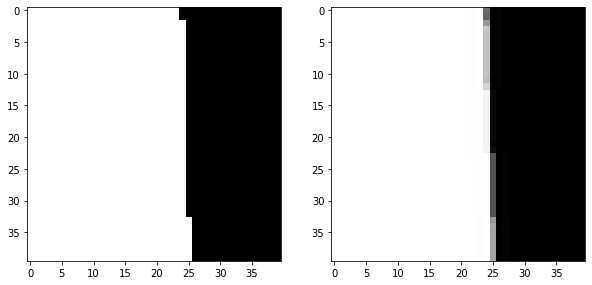

In [271]:

plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(y_tr[n].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,2,2)
plt.imshow(y_train[n].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
np.unique(y_tr)

In [249]:
y_t = to_categorical(y_tr)

In [272]:
unet = UNET(image_shape = (PATCH_SIZE, PATCH_SIZE, 3), layers = 2)
unet.build_model()
model = unet.get_model()

Building model with 2 layers
Filtersizes being used in UNET: [20 40 80]
Bulding contraction layers at layer: 1 and filtersize: 20
Bulding contraction layers at layer: 2 and filtersize: 40
Building bottleneck at layer: 2 and filtersize: 80
Building expansion at layer: 2 and filtersize: 40
Building expansion at layer: 1 and filtersize: 20
Compiling model...
Model compiled.


In [273]:
model.load_weights('./models/weights02_13.49.h5')

In [335]:
n = 100
pred = model.predict(x_test[n:n+1, :, :, :])
pred[pred >= 0.5] = 1
pred[pred < 0.5] = 0
pred = np.argmax(pred, axis = 3)
print(pred.shape)


(1, 40, 40)


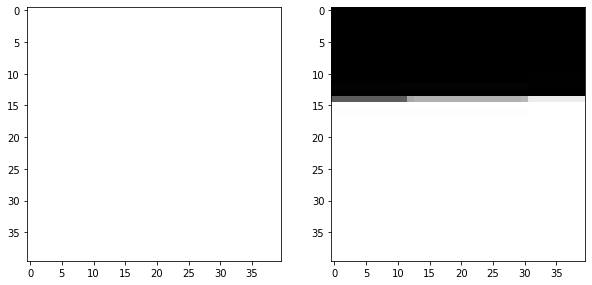

In [336]:
f = plt.figure(figsize = (10, 10))
plt.subplot(1,2,1)
plt.imshow(pred[0].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,2,2)
plt.imshow(y_train[n].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')